# A Very Simplified MultiCopter Design with Python
Objectives : 
* Get familiar with Colab Notebooks
* Learn simple Python
* Prepare building blocks for multicopter optmization

<a href="https://colab.research.google.com/github/mrtbrnz/Intro2UAS/blob/master/notebooks/00_simple_MultiCopter_design.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Introduction to NumPy
*This notebook contains several excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

You can import NumPy and double-check the version:

In [ ]:
import numpy
numpy.__version__

'1.21.6'

By convention, you'll find that most people in the SciPy/PyData world will import NumPy using ``np`` as an alias:

In [1]:
import numpy as np

## Reminder about Built In Documentation

For example, to display all the contents of the numpy namespace, you can type this:

```ipython
In [3]: np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
In [4]: np?
```

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.

In [ ]:
# Try here !
np?

Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing.
While a statically-typed language like C or Java requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. For example, in C you might specify a particular operation as follows:

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i
```

Notice the main difference: in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

## A Python List Is More Than Just a List

```ipython
L = list(range(10))
L
```

```ipython
L2 = [str(c) for c in L]
L2
```

```ipython
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]
```


In [ ]:
#Try here
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
L3 = [True, "2", 3.0, 4]
L4 = [type(item) for item in L3]

In [ ]:
print(L3)
print(L4)

[True, '2', 3.0, 4]
[<class 'bool'>, <class 'str'>, <class 'float'>, <class 'int'>]


## Create arrays

```ipython
np.arange(5)
```
```ipython
np.linspace(1,10,10)
```
```ipython
np.
```
```ipython
np.
```

In [4]:
# Try here:
np.linspace(1,10,20)


array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

## Lets plot something

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

Fontconfig warning: ignoring UTF-8: not a valid region tag


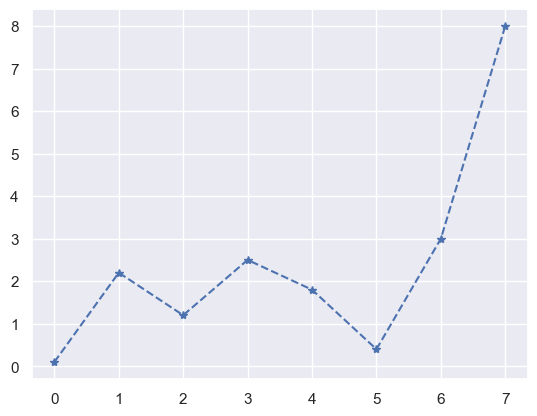

In [6]:
x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [0.1, 2.2, 1.2, 2.5, 1.8, 0.4, 3, 8]
plt.plot(x,y,'--*')

In [ ]:
len(y)

8

In [ ]:
# data = np.random.randint(1,5,6)
data = np.random.rand(200)*22

In [ ]:
data

array([ 5.82624399, 16.17118399, 17.87558947, 15.58412106,  7.16310831,
       18.8216645 , 12.76277975, 21.68900827,  2.24344965,  3.6365953 ,
       10.52760425,  1.05257786, 19.61236161, 14.07485954,  0.75873624,
        0.15396114,  0.45594094,  3.47758406,  0.643903  ,  5.23715156,
       15.032692  , 11.29813886, 14.76326258,  1.8691944 ,  8.35709543,
       18.59882791,  2.14864364, 15.32563765, 21.04392312, 18.64078908,
       18.36408394,  1.00755034, 14.52592502,  3.83123488,  4.01635298,
        6.88849284,  5.47060972, 15.99333335, 21.119166  ,  0.52674247,
       13.86236588,  2.50539084, 12.68753937, 13.49075213, 16.36571961,
       20.59371707,  1.25280869,  7.12803519, 10.48833847,  2.51005617,
       12.90550337, 13.81616806, 18.83212487,  0.09085619, 18.75585332,
       16.85360524,  1.13784278,  2.42600967,  8.71562662,  4.28820606,
       11.52813568, 15.74703623, 21.13280254, 12.75322431, 18.46562696,
       20.57486515,  2.06961151, 15.98744052, 20.63257244,  0.08

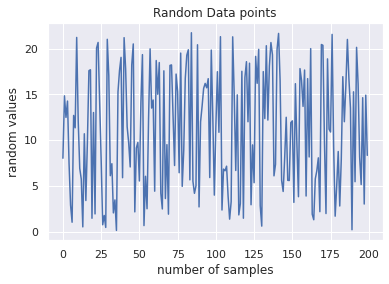

In [ ]:
plt.plot(data)
plt.title('Random Data points')
plt.xlabel('number of samples')
plt.ylabel('random values');

In [ ]:
# seaborn.reset_orig()
seaborn.set()

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

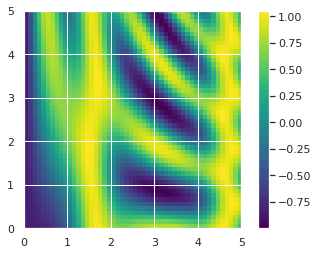

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Now, let's move onto a real example !
(Example from Antoine Drouin)

International Standard Atmosphere Model
see:
 http://en.wikipedia.org/wiki/International_Standard_Atmosphere


In [ ]:
'''
International Standard Atmosphere Model
see: http://en.wikipedia.org/wiki/International_Standard_Atmosphere
'''
_name, _h0, _z0, _a, _T0, _p0 = np.arange(6)
#      name         h(m)    z(km)    a(K/m)    T0(K)    p0(Pa)
param = \
[['Troposphere',       0,   0.0,    -6.5e-3,   288.15,   101325],
 ['Tropopause',    11000,  11.019,   0.,       216.65,    22632],
 ['Stratosphere',  20000,  20.063,   1.0e-3,   216.65,   5474.9],
 ['Stratosphere',  32000,  32.162,   2.8e-3,   228.65,   868.02],
 ['Stratopause',   47000,  47.350,   0.0e-3,   270.65,   110.91],
 ['Mesosphere',    51000,  51.413,  -2.8e-3,   270.65,   66.939],
 ['Mesosphere',    71000,  71.802,  -2.0e-3,   214.65,   3.9564],
 ['Mesopause',     84852,  86.000,   0.,       186.87,   0.3734]]

In [ ]:
import math

def mach_of_va(va, T, k=1.4, Rs=287.05): return va/np.sqrt(k*Rs*T)

def get_rho(h):
    """
    Get air density at the given altitude (in m)
    Warning, the two parts of that function do not
    join well!
    """
    if h<= 11000:
        return 1.225 * math.pow((1-6.5e-3*h/288.15), 4.2557)
    else:
        return 0.36 * np.exp(-1.17e-4*(h-11000))

def isa(h):
    layer = 0
    while param[layer][_h0] < h: layer+=1
    name, h0, z0, a, T0, p0 = param[layer-1]
    dh = h - h0
    T = T0 + a*dh
    g=9.81; R=287.0
    if a != 0.:
        p = p0*math.pow(T/T0, -g/a/R)
    else:
        p = p0*math.exp(-g/R/T0*dh)
    rho = p/R/T
    return p, rho, T

In [ ]:
# get_rho(10)
isa(10)

(101204.86307898168, 1.224049099898249, 288.085)

In [ ]:
def decorate(ax, title=None, xlab=None, ylab=None, legend=None):
    ax.xaxis.grid(color='k', linestyle='-', linewidth=0.2)
    ax.yaxis.grid(color='k', linestyle='-', linewidth=0.2)
    if xlab:
        ax.xaxis.set_label_text(xlab)
    if ylab:
        ax.yaxis.set_label_text(ylab)
    if title:
        ax.set_title(title, {'color'    : 'k', 'fontsize'   : 20 })
    if legend != None:
        ax.legend(legend, loc='best')

def plot_atmosphere(h0=1, h1=84000):
    h = np.linspace(h0, h1, 1000)
    v = np.array(list(map(isa, h)))
    v1 = np.array(list(map(get_rho, h)))
    # print(v1)
    #pdb.set_trace()
    
    ax = plt.subplot(1, 3, 1)
    plt.plot(v[:,2], h)
    decorate(ax, 'Temperature', 'K', 'm')
    ax = plt.subplot(1, 3, 2)
    plt.plot(v[:,1], h)
    plt.plot(v1, h, 'r')
    decorate(ax, 'Density', 'Kg/m3', 'm')
    ax = plt.subplot(1, 3, 3)
    plt.plot(v[:,0], h)
    decorate(ax, 'Pressure', 'Pa', 'm')
    plt.show()

ISA at 1m : 101312.98111336395 Pa 1.225107985548939 kg/m3 288.14349999999996 K


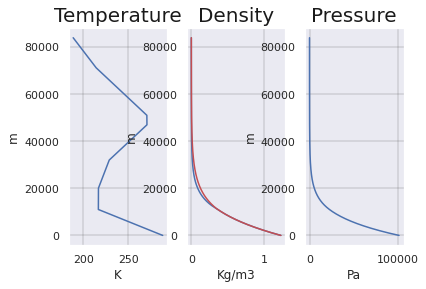

In [ ]:
h = 1
print(f"ISA at {h}m : {isa(h)[0]} Pa {isa(h)[1]} kg/m3 {isa(h)[2]} K")

plot_atmosphere(h0=1, h1=84000)

In [ ]:
# Try to get ISA rho at an altitude:
isa(1000)

(89868.89533000505, 1.1117771683911577, 281.65)

# Propeller Force

We can simplify the thrust as the mass flow rate difference of input and output of the propeller disk 

$F = \dot{m}(V_e-V_0)$

Mass flow rate is : \
$\dot{m}=\rho A V_e$ 

Propeller disc area is : \
$A = \frac{\pi d^2}{4}$

Total Thrust can be written as \
$F =\rho\frac{\pi d^2}{4} (V_e^2- V_eV_0)$  

Where we can approximate the exit veocity as \
$V_e = \eta_{prop}V_{pitch}$

A very simplified way of defining the pitch speed of the proppeler

$V_{pitch} = RPM_{prop} Prop_{pitch}$  with units in $[inches/minutes]$

So convert to m/s by multipliying with 0.0254/60...

In [32]:
prop_pitch = 5 #inches
prop_diameter = 5 #inches
cd_arm   = 1.5 # drag coefficient of the arms (source: Hoerner)
cd_frame = 1.2 # Realistic for a bluff body
area_arm = 0.01*prop_diameter*0.0254/2  #m^2, area of the arms below the propeller, constant thickness of 1cm          
angle_tilted_body = 0/180*np.pi #rad, how much is the nose of the frame tilted up in the design
frame_width = 0.05 #m
frame_length = 0.17 #m
area_frame_frontal = frame_width**2 # m^2 area of the main body of the frame as viewed from the front 
area_frame_dorsal  = frame_width*frame_length # m^2 area of the main body of the frame as viewed from the top 
gee = 9.81 # Gravitational acceleration

In [8]:
# Write a function that estimates the force of a propeller
# Use RPM and V_0 as an input
def prop_force(RPM, V_0=0):
    prop_eff = 0.65 # Guesssing a value between 0.5 - 0.75
    rho = 1.225 # Get this out of ISA
    V_pitch = RPM*prop_pitch/60*0.0254
    V_e = prop_eff * V_pitch
    A = np.pi*(prop_diameter/2*0.0254)**2
    m_dot = A*V_e*rho
    force = rho*A*(V_e**2-V_e*V_0)
    return force

In [9]:
prop_force(20000, 26)

0.6476186944422351

## Estimate the mass
* Battery
* Fuselage
* Arms
* Avionics (Autopilot, modem, receiver,etc...)
* ...

In [10]:
def estimate_mass(num_motors=4, batt_cap=50, k_mat=0.01, m_avionics=0.04, m_payload=0.05):
    '''Updates the total mass estimation'''
    k_batt = 180. # Wh/kg
    m_batt = batt_cap/k_batt
    m_frame = k_mat*prop_diameter*num_motors # mass of the frame per inches 
    mass = m_payload + m_avionics + m_frame + m_batt
    return mass

estimate_mass()

0.5677777777777778

# Now write a function that finds the hover thrust
* Input only RPM again


In [33]:
# Define the constants, and design parameters
# Estimate the mass
# Find the thrust that has to be generated by each motor
# Iterate over RPM to reach that thrust
# Extra : you can take into account the drag of the arms as downforce (If we have time in the class!)
num_motors = 4
mass = estimate_mass()
#Initial thrust set to zero
thrust = 0.
# Initiate the RPM to zero
RPM=0
# Iterate the RPM to reach required thrust !
while mass*gee/num_motors >= thrust:
    RPM +=10
    thrust = prop_force(RPM)
print(f' Required RPM for each propeller : {RPM}')

 Required RPM for each propeller : 6890


In [34]:
# We can write the above more efficiently by using an optimization algorithm such as Newton-Raphson (secant or Haley's according to the fprime functions...)
# ref : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
# The function should be re-written to converge towards zero for the wanted value:
from scipy import optimize

def find_hover_rpm(rpm):
    thrust = prop_force(rpm)
    return (mass*gee/num_motors)-thrust

hover_rpm = optimize.newton(find_hover_rpm, 1000.)
print(hover_rpm)

6885.114550169183


## If we assume zero vertical movement, any excessive RPM more than the hover will result in forward movement as the multicopter will require to pitch down.

* Let's calculate the drag force and resultant forward velocity

In [50]:
# First decide the RPM
RPM = 8000
# Feed RPM to the function that calculates the level translation speed and drag of the multicopter
calc_level_V_and_drag(RPM)

 Theta : 4.585987261146497deg, V : 3.5358460177986646 , drag : 0.029141271741976116 


(0.08, 3.5358460177986646, 0.029141271741976116)

# Drag Force



In [47]:
def calc_level_V_and_drag(rpm):
    # Initial Total Thrust from all motors at zero forward speed
    T_total = prop_force(rpm, V_0=0.)*num_motors
    # Find bank angle , initiate drag and theta to zero for start
    drag = 0. ; theta = 0. ; V=0.
    while T_total*np.sin(theta) >= drag and T_total*np.cos(theta) >= mass*gee:
        theta += 0.01
        # required forward thrust component
        T_forward = np.tan(theta) * mass*gee
        # Final velocity from given acceleration (assume 1s of impulse)
        V += T_forward/mass
        # Drag of the fuselage
        area_frame_horizontal = np.abs(np.sin(theta-angle_tilted_body)*area_frame_dorsal) + np.abs(np.cos(theta-angle_tilted_body)*area_frame_frontal) #m^2
        # Optional : Drag of the motor arms embedded inside propeller slipstream
        # Final drag
        drag = 0.5 * 1.225 * V**2 * area_frame_horizontal * cd_frame
        T_total = prop_force(rpm, V_0=V)*num_motors
        
    print(f' Theta : {theta*180/3.14}deg, V : {V} , drag : {drag} ')
    return theta, V, drag

# Required Power
Required mechanical power from motor is torque times rpm (rad/s)!

$P_{req} = Q_{propeller} \Omega $

where   $\Omega = RPM 2 \pi /60$

and $Q_{propeller}$ is proportional to Thrust such as 

$T = 1/2 \rho (\Omega R)^2 \pi R^2 C_{T}$

$Q = 1/2 \rho (\Omega R)^2 \pi R^3 C_{P}$

This can be used to approximate a power requirement with respect to RPM 



In [59]:
# Try that now :
def power_required(rpm, V):
    # An efficiency can be use such as L/D ratio to define the ratio between Thrust and Drag, and Torque is directly proportional to drag...
    T_over_D = 2.
    T = prop_force(rpm, V_0=V)
    Q = T * prop_diameter*0.0254/2 # multiplied with R
    P_required = Q * rpm * 2. * np.pi / 60. / T_over_D

    return P_required

power_required(24000, 30)
# power_required(8000, 3)

123.48124885806773

# Now Create a MultiCopter Class

*   Initiates with default values and coeffs
*   Estimates total mass
*   Calculates total drag at a given flight speed
*   Calculates total propulsion consumption at that flight speed



In [150]:
class MultiCopter():
    def __init__(self, num_motors=4, prop_pitch=5., prop_diam=5., prop_eff=0.55, 
                       batt_cap=50, k_batt=180.,
                       frame_width=0.05, frame_length = 0.17,
                       k_mat=0.01, m_avionics=0.04, m_payload=0.05):
        self.num_motors = num_motors # Motor number
        self.batt_cap = batt_cap # Battery energy capacity in [Wh]
        self.k_batt = k_batt # Battery specific energy in [Wh/kg]
        self.k_mat = k_mat # Fuselage metrial density
        self.prop_pitch = prop_pitch # Propeller pitch [in inches]
        self.prop_diameter = prop_diam # Propeller diameter [in inches]
        self.prop_eff = prop_eff # Guesssing a value between 0.5 - 0.75
        self.cd_arm   = 1.5 # drag coefficient of the arms (source: Hoerner)
        self.cd_frame = 1.2 # Realistic for a bluff body
        self.area_arm = 0.01*self.prop_diameter*0.0254/2  #m^2, area of the arms below the propeller, constant thickness of 1cm          
        self.angle_tilted_body = 0/180*np.pi #rad, how much is the nose of the frame tilted up in the design
        self.frame_width = frame_width #m
        self.frame_length = frame_length #m
        self.area_frame_frontal = self.frame_width**2 # m^2 area of the main body of the frame as viewed from the front 
        self.area_frame_dorsal  = self.frame_width*self.frame_length # m^2 area of the main body of the frame as viewed from the top 
        self.gee = 9.81 # Gravitational acceleration
        self.rho = 1.225 # Get this out of ISA
        self.m_payload = m_payload
        self.m_avionics = m_avionics
        self.estimate_mass() # Initial mass

    def estimate_mass(self):
        '''Updates the total mass estimation'''
        self.m_batt = self.batt_cap/self.k_batt
        self.m_frame = self.k_mat*self.prop_diameter*self.num_motors # mass of the frame per inches 
        self.mass = self.m_payload + self.m_avionics + self.m_frame + self.m_batt
    
    def prop_force(self,rpm, V_0=0):
        V_pitch = rpm*self.prop_pitch/60*0.0254
        V_e = self.prop_eff * V_pitch
        A = np.pi*(self.prop_diameter/2*0.0254)**2
        m_dot = A*V_e*self.rho
        force = self.rho*A*(V_e**2-V_e*V_0)
        return force

    def calc_level_V_and_drag(self,rpm):
        # Initial Total Thrust from all motors at zero forward speed
        T_total = self.prop_force(rpm, V_0=0.)*self.num_motors
        # Find bank angle , initiate drag and theta to zero for start
        drag = 0. ; theta = 0. ; V=0.
        while T_total*np.sin(theta) >= drag and T_total*np.cos(theta) >= self.mass*self.gee:
            theta += 0.001
            # required forward thrust component
            T_forward = np.tan(theta) * self.mass*self.gee
            # Final velocity from given acceleration (assume 1s of impulse)
            V += T_forward/self.mass
            # Drag of the fuselage
            area_frame_horizontal = np.abs(np.sin(theta-self.angle_tilted_body)*self.area_frame_dorsal) + np.abs(np.cos(theta-self.angle_tilted_body)*self.area_frame_frontal) #m^2
            # Optional : Drag of the motor arms embedded inside propeller slipstream
            # Final drag
            drag = 0.5 * 1.225 * V**2 * area_frame_horizontal * self.cd_frame
            T_total = self.prop_force(rpm, V_0=V)*self.num_motors
            
        # print(f' Theta : {theta*180/3.14}deg, V : {V} , drag : {drag} ')
        return theta, V, drag

    def rpm_at_V(self, V):
        '''# def find_rpm(rpm):
        #     _,V_rpm,_ = self.calc_level_V_and_drag(rpm)
        #     return V-V_rpm
        # rpm_at_V = optimize.newton(find_rpm, 10000.)'''
        rpm = 1000. ; V_rpm = 0.
        while V >= V_rpm:
            _,V_rpm,_ = self.calc_level_V_and_drag(rpm)
            rpm += 10.
    
        return rpm

    def power_required(self,rpm, V):
        # An efficiency can be use such as L/D ratio to define the ratio between Thrust and Drag, and Torque is directly proportional to drag...
        T_over_D = self.prop_diameter/2.5 # a very rough approximation ... Need to be fixed !
        T = self.prop_force(rpm, V_0=V)
        Q = T * self.prop_diameter*0.0254/2 # multiplied with R
        P_required = Q * rpm * 2. * np.pi / 60. / T_over_D
        return P_required
    
    def power_at_V(self, V):
        rpm = self.rpm_at_V(V)
        return self.power_required(rpm,V)*self.num_motors

    def performance_at_V(self,V):
        P_req = self.power_at_V(V)
        endurance = self.batt_cap/P_req*3600
        range = V*endurance
        return range, endurance


In [151]:
from scipy import optimize
mc = MultiCopter(prop_diam=5.)

In [138]:
# Propeller force at 4000 RPM
mc.prop_force(4000)

0.6595379440705961

In [117]:
# Inclination angle, Velocity and drag for 10000 RPM
mc.calc_level_V_and_drag(10000)

(0.03000000000000002, 4.562357231055003, 0.04213122810018111)

In [118]:
mc.rpm_at_V(28)

32780.0

In [1]:
mc.power_at_V(0)

NameError: name 'mc' is not defined

In [120]:
d,t = mc.performance_at_V(0)
d,t/60.

(0.0, 19.813096622156504)

# Now lets try to optimize the propeller and frame 

In [153]:
batt_array = np.arange(10,90,10)
V_array = np.arange(0,16,2)
prop_diam_array = np.arange(5,7,0.5)

best = np.zeros(10)
for batt in batt_array:
    for prop_diam in prop_diam_array:
        for V in V_array:
            mc=MultiCopter(batt_cap=batt, prop_diam=prop_diam)
            r,t = mc.performance_at_V(V)

            # Now you can choose what to optimize
            # best[0] = r if r > best[0] else best[0]
            # best[1] = t if t > best[1] else best[1]

            # or better do a performance metric to record the best candidate
            metric = t # or r*t just as an example
            if best[0] < metric:
                best[0] = metric
                best[1:6] = [r, t, batt, prop_diam, V]
                print(f'Found best with metric : {metric}')


Found best with metric : 500.30527599215486
Found best with metric : 504.975330643015
Found best with metric : 508.9555523907894
Found best with metric : 511.5547437363572
Found best with metric : 800.8749518913761
Found best with metric : 815.3582701592038
Found best with metric : 831.7512574763148
Found best with metric : 840.0408916021482
Found best with metric : 988.4974505866014
Found best with metric : 1019.3726830895894
Found best with metric : 1042.3026583169894
Found best with metric : 1063.0666959460589
Found best with metric : 1110.3081789510684
Found best with metric : 1149.4966713737238
Found best with metric : 1188.7198663221325
Found best with metric : 1218.3107269151426
Found best with metric : 1240.7292653174295
Found best with metric : 1286.3168743669528
Found best with metric : 1324.518177352688
Found best with metric : 1356.1477515878223
Found best with metric : 1403.1550407763878
Found best with metric : 1452.3747775705365
Found best with metric : 1491.413247044773

In [154]:
best

array([1491.41324704,    0.        , 1491.41324704,   80.        ,
          6.5       ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ])

In [132]:
best

array([1.57048377e+07, 1.37280025e+04, 1.14400021e+03, 8.00000000e+01,
       3.00000000e+00, 1.20000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

<a href="https://colab.research.google.com/github/mrtbrnz/Intro2UAS/blob/master/notebooks/00_simple_MultiCopter_design.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
